# FINAL PROJECT PRESENTATION
### OBJECTIVE:

In this objective, the primary goal is to employ machine learning techniques to construct a reliable model for predicting individuals' income categories. The dataset, comprising demographic and employment features, serves as the foundation for this task. By implementing classification algorithms, the objective is to create a model capable of accurately categorizing individuals into income groups.

### OUTLINE:

1. EDA (Exploratory Data Analysis):

            ->Introduction to the dataset (X_train) and its features.
            ->Descriptive statistics, data visualization, and initial insights.
            ->Identification of patterns, outliers, and potential areas for feature engineering.

2. UNSUPERVISED CLUSTERING:

            ->Application of unsupervised clustering algorithms to discover inherent structures.
            ->Exploration of cluster characteristics and their significance in the dataset.
            ->Visualization of clusters to aid in understanding the data distribution.

3. SEMI -SUPERVISED LEARNING:

            ->Integration of supervised and unsupervised algorithms for model training.
            ->Utilization of labeled and unlabeled data in the X_train set.
            ->Application of semi-supervised learning techniques to improve model generalization.

4. MODEL EVALUATION AND TUNING:

            ->Assessment of model performance using relevant metrics.
            ->Fine-tuning of hyperparameters based on evaluation results.
            ->Iterative refinement to enhance the effectiveness of the semi-supervised model.

5. CONCLUSION:

            Summary of key findings from EDA and clustering.
            Insights gained from the semi-supervised learning approach.
            Reflection on the model's performance, limitations, and potential areas for future exploration.
            This outline provides a structured approach to the project, beginning with data exploration, followed by the application of -semi-supervised techniques, and concluding with a comprehensive evaluation and summary of the project's outcomes.





### GOALS:
The primary goal of this project is to develop a predictive model for income classification using demographic and employment information. The dataset encompasses features such as age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, and native country, suggesting a binary classification task—predicting whether an individual's income exceeds a specified threshold, like ">50K" or "<=50K". The project's objectives include defining the target variable, conducting thorough data preprocessing and exploration, selecting and implementing suitable classification algorithms, evaluating and tuning model performance, enhancing interpretability by analyzing feature importance, addressing biases for fair predictions, and documenting the entire process for effective communication with stakeholders. The overarching aim is to create a reliable and transparent predictive model that not only accurately classifies income levels but also ensures fairness and interpretability in the predictions, contributing to a comprehensive understanding of the socio-economic factors influencing individual income.

In [3]:
import pandas as pd
df_train_x = pd.read_csv("final_train_X")
df_train_y = pd.read_csv("final_train_y_dont_use")
df_train_x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,147548,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40,United-States
1,48,Private,195491,HS-grad,9.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,30,United-States
2,43,Self-emp-not-inc,198096,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60,United-States
3,18,Private,280603,11th,7.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,30,United-States
4,30,Private,36383,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40,Mexico


In [4]:
print("Number of duplicate rows in df_train_x:", df_train_x.duplicated().sum())
df_train_x = df_train_x.drop_duplicates()
print("Number of duplicate rows after removal:", df_train_x.duplicated().sum())


Number of duplicate rows in df_train_x: 4672902
Number of duplicate rows after removal: 0


In [5]:
df_train_x = df_train_x.dropna()
print("Missing values in df_train_x:")
df_train_x.isnull().sum()

Missing values in df_train_x:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

The initial inspection reveals missing values in several columns of the df_train_x dataset. Columns such as workclass, education, and others contain varying amounts of missing data.

The missing values in categorical columns (workclass, education, marital_status, occupation, relationship, race, sex, native_country) have been filled with the most frequent values.

The missing values in numerical columns (education_num, capital_gain, capital_loss) have been filled with the mean values.

After handling missing values, a check is performed, and no missing values are observed in the df_train_x dataset.

# EDA

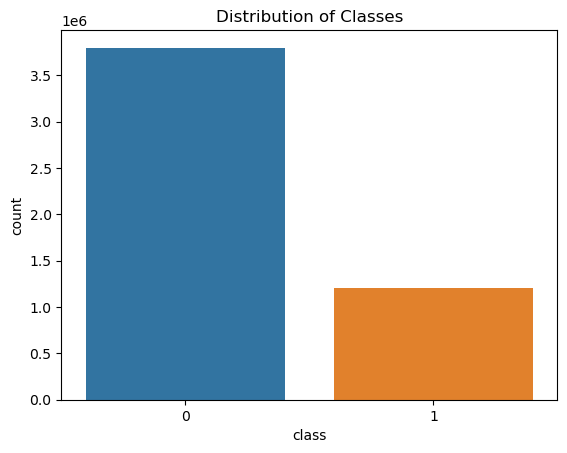

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='class', data=df_train_y)
plt.title('Distribution of Classes')
plt.show()

Based on the above visualization, it is evident that the data is highly imbalanced. 

However, this imbalance is not expected to impact our results significantly, as we plan to address this issue through a semi-supervised approach.

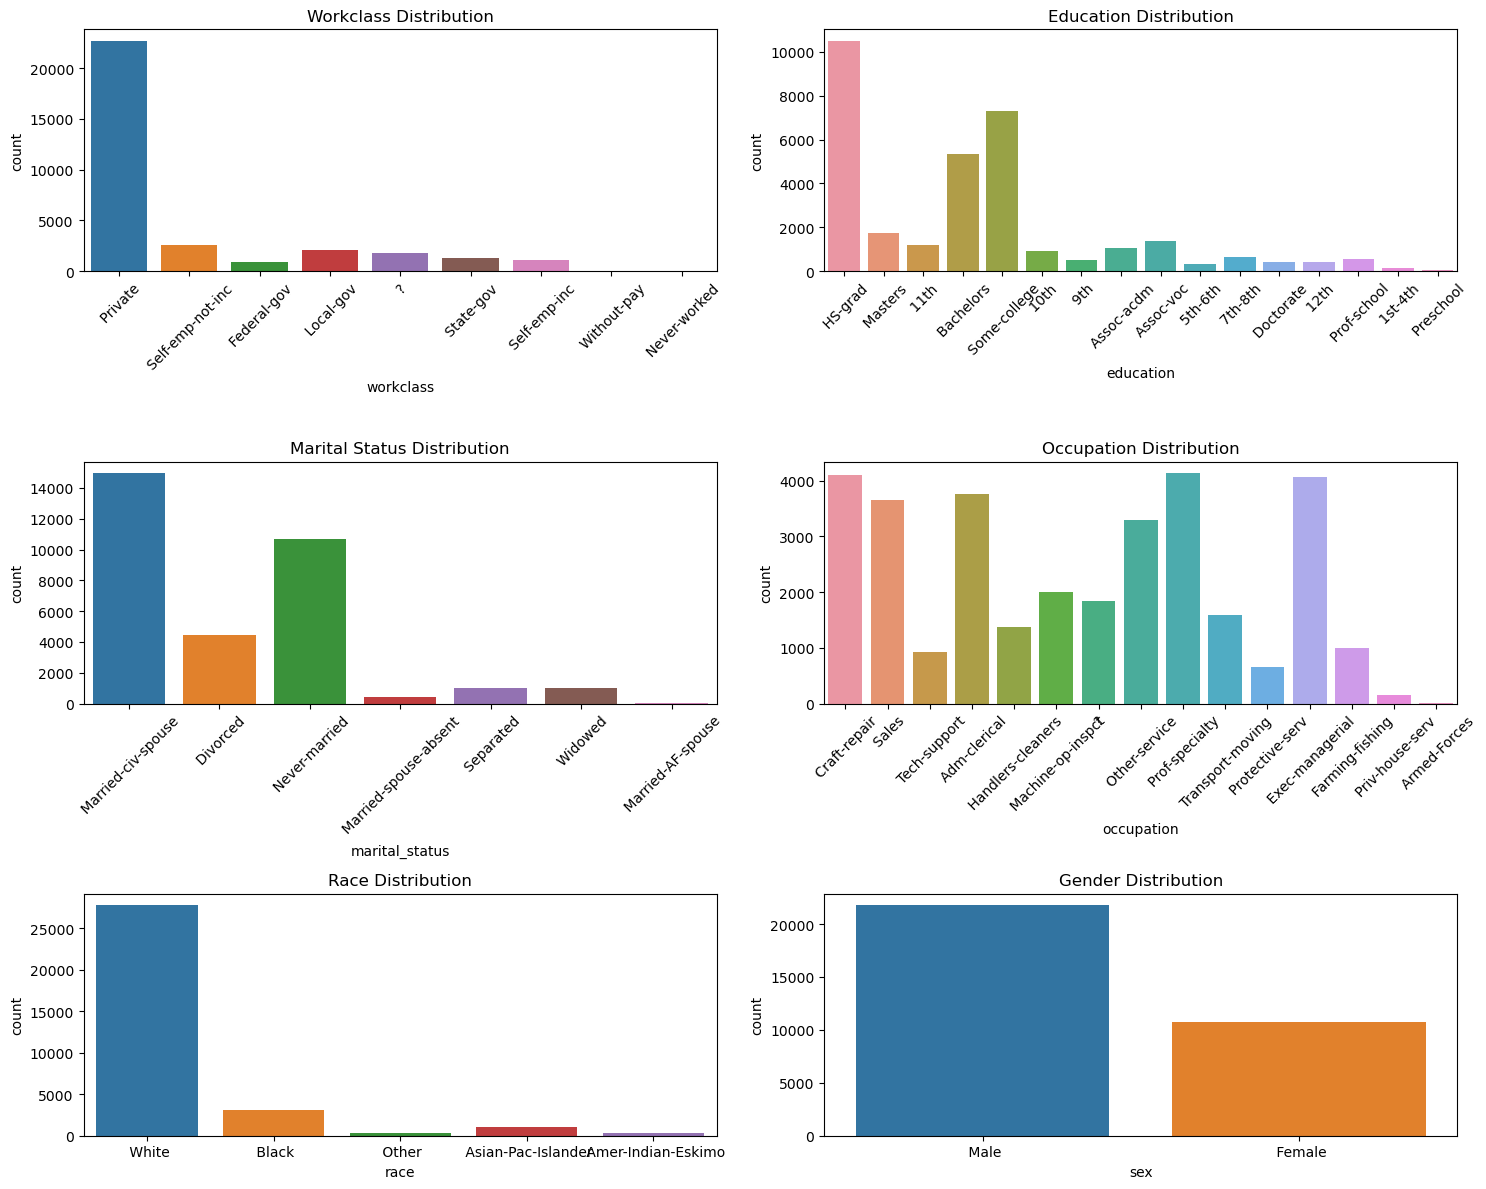

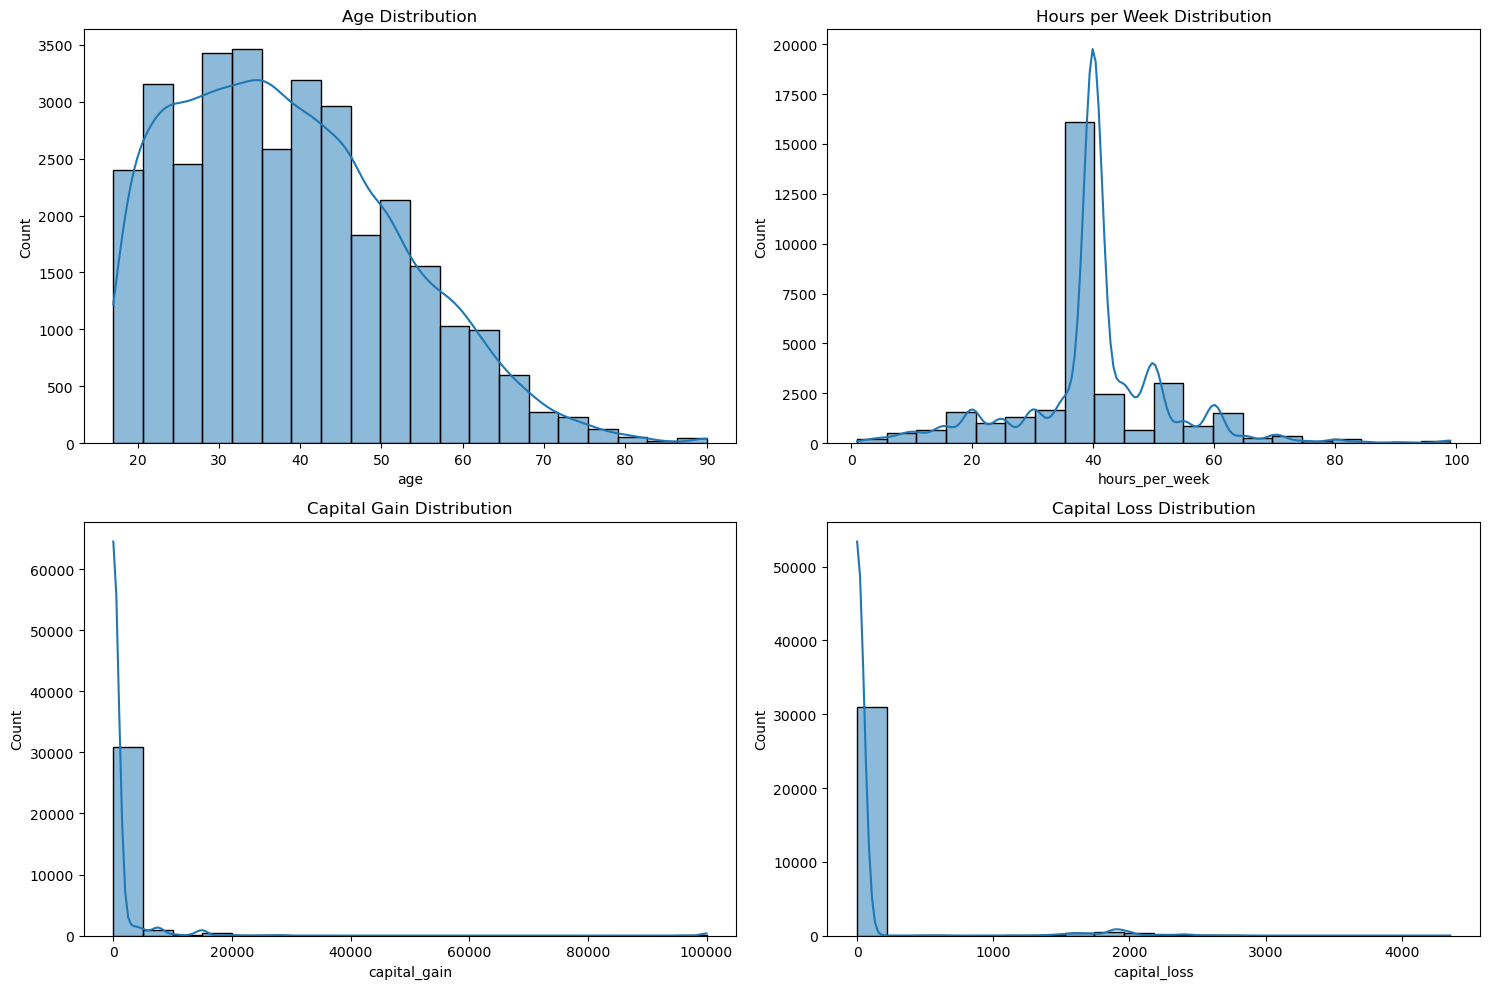

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of categorical variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

sns.countplot(x='workclass', data=df_train_x, ax=axes[0, 0])
axes[0, 0].set_title('Workclass Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='education', data=df_train_x, ax=axes[0, 1])
axes[0, 1].set_title('Education Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='marital_status', data=df_train_x, ax=axes[1, 0])
axes[1, 0].set_title('Marital Status Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='occupation', data=df_train_x, ax=axes[1, 1])
axes[1, 1].set_title('Occupation Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='race', data=df_train_x, ax=axes[2, 0])
axes[2, 0].set_title('Race Distribution')

sns.countplot(x='sex', data=df_train_x, ax=axes[2, 1])
axes[2, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

# Distribution of numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(df_train_x['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df_train_x['hours_per_week'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Hours per Week Distribution')

sns.histplot(df_train_x['capital_gain'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capital Gain Distribution')

sns.histplot(df_train_x['capital_loss'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Capital Loss Distribution')

plt.tight_layout()
plt.show()


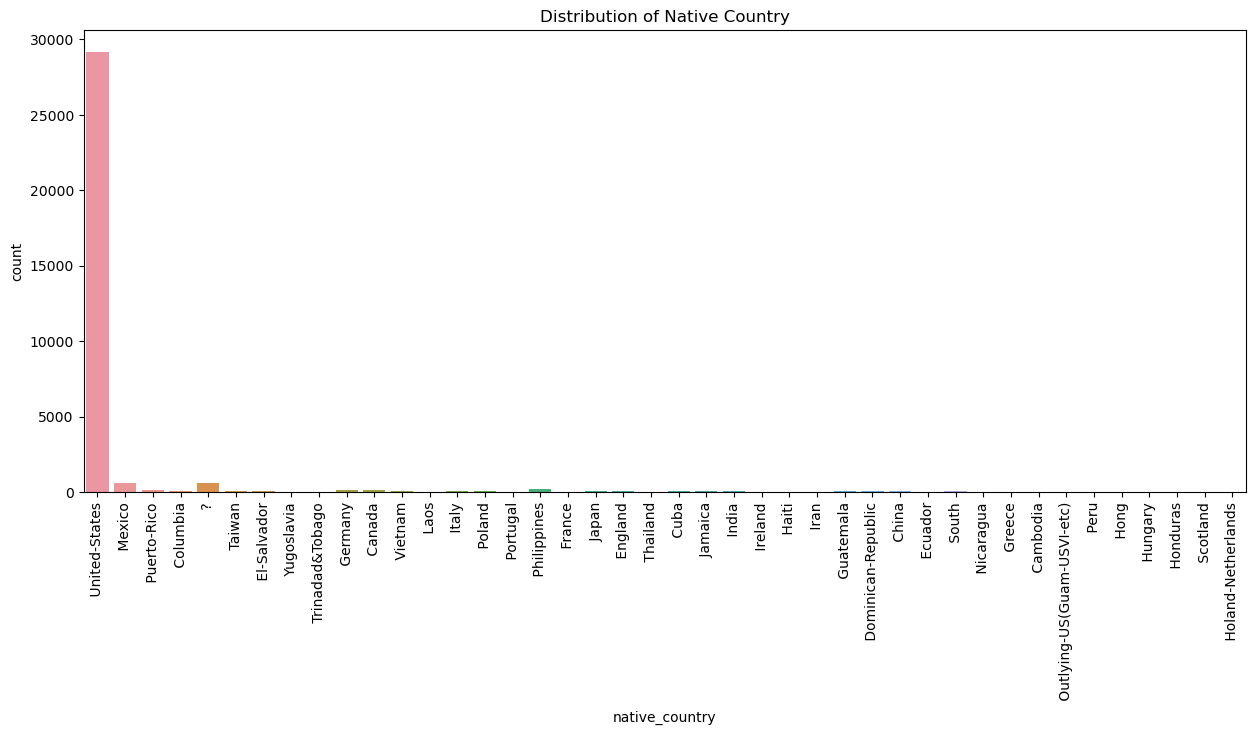

In [8]:
plt.figure(figsize=(15, 6))
sns.countplot(x='native_country', data=df_train_x)
plt.title('Distribution of Native Country')
plt.xticks(rotation=90)
plt.show()

We can see here from the above visualization that united states dominated most of the data.

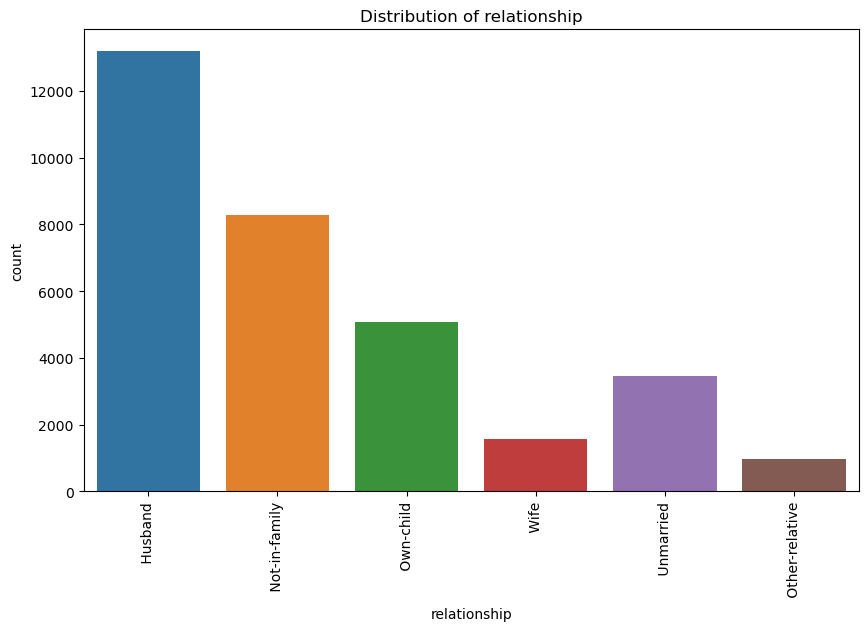

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', data=df_train_x)
plt.title('Distribution of relationship')
plt.xticks(rotation=90)
plt.show()

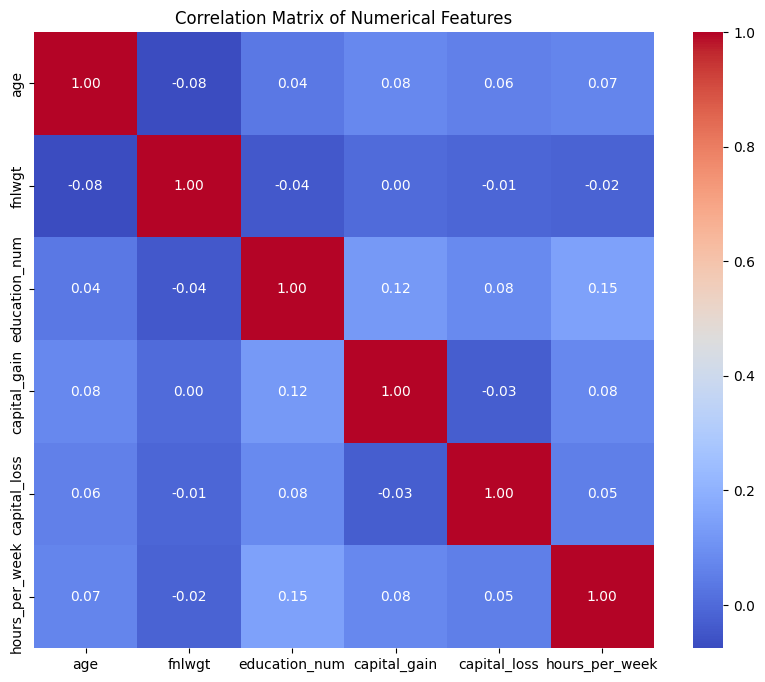

In [11]:
numerical_columns = df_train_x.select_dtypes(include=['number']).columns
correlation_matrix = df_train_x[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Based on the correlation matrix above, it's evident that fnlwgt has a lower correlation with other features. This suggests that fnlwgt doesn't contribute significantly to the dataset, as indicated by the visualization.

In [4]:
columns_to_drop = ["native_country", "education", "fnlwgt"]
df_train_x = df_train_x.drop(columns=columns_to_drop)
df_train_x.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In this data preprocessing step, we have opted to remove certain columns—specifically, native_country, education, and fnlwgt—from the dataset. The decision is informed by the findings in the exploratory data analysis (EDA). Notably, in the native_country column, the overwhelming majority of entries correspond to the United States, rendering this feature less informative for our analysis. Moreover, we find that the numerical variable education_num provides a comparable representation to the education column, making the latter redundant. Lastly, the column fnlwgt is being dropped due to its low correlation with other features, as revealed in our analysis.


##### Unsupervised Clustering

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Define numerical and categorical features
numerical_features = df_train_x.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_train_x.select_dtypes(include=['object']).columns

# Create a pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations to the data
X_processed = preprocessor.fit_transform(df_train_x)

##### kmeans

In [6]:
# Create a function for k-means clustering and evaluation
def kmeans_clustering(X, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.plot(k_range, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Plot for KMeans')
    plt.show()


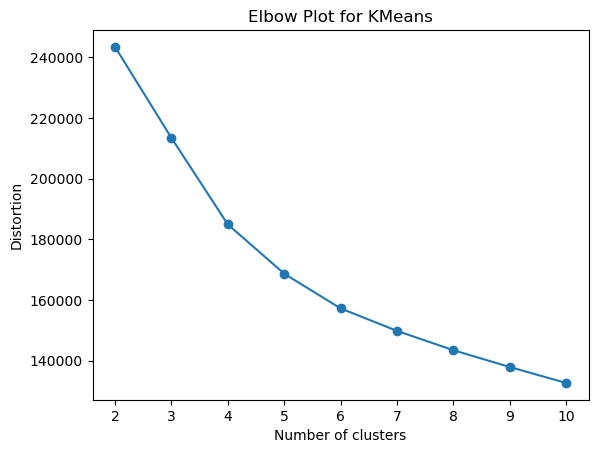

In [7]:
# Define the range of clusters for the elbow plot
k_range = range(2, 11)

# Generate elbow plot for k-means
kmeans_clustering(X_processed, k_range)

In [8]:
# # Apply k-means clustering with the optimal number of clusters
# k_optimal = 5  # Adjust based on the elbow plot
# kmeans = KMeans(n_clusters=k_optimal, random_state=42)
# labels_kmeans = kmeans.fit_predict(X_processed)


In [9]:
# Apply k-means clustering with different hyperparameters
k_optimal = 5  # Adjust based on the elbow plot
init_method = 'k-means++'  # or 'random'
max_iterations = 300
tolerance = 0.0001

kmeans = KMeans(n_clusters=k_optimal, init=init_method, max_iter=max_iterations, tol=tolerance, random_state=42)
labels_kmeans = kmeans.fit_predict(X_processed)


In [10]:
# Evaluate k-means clustering
silhouette_kmeans = silhouette_score(X_processed, labels_kmeans)

# Convert sparse matrix to dense array for davies_bouldin_score
X_dense = X_processed.toarray()
davies_bouldin_kmeans = davies_bouldin_score(X_dense, labels_kmeans)

print(f"Silhouette Score (KMeans): {silhouette_kmeans}")
print(f"Davies-Bouldin Score (KMeans): {davies_bouldin_kmeans}")


Silhouette Score (KMeans): 0.15338875587220674
Davies-Bouldin Score (KMeans): 1.573350712204364


In [12]:
# Assuming df_train_x is your DataFrame with KMeans cluster labels
df_train_x['KMeans_Cluster'] = labels_kmeans

# Display the head of the data with cluster labels
df_train_x.head()


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,KMeans_Cluster
0,39,Private,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40,2
1,48,Private,9.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,30,1
2,43,Self-emp-not-inc,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60,2
3,18,Private,7.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,30,0
4,30,Private,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40,2


##### Agglomerative Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Convert sparse matrix to dense array
X_dense = X_processed.toarray()

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
labels_agglomerative = agglomerative.fit_predict(X_dense)

# Evaluate Agglomerative Clustering
silhouette_agglomerative = silhouette_score(X_dense, labels_agglomerative)
davies_bouldin_agglomerative = davies_bouldin_score(X_dense, labels_agglomerative)

print(f"Silhouette Score (Agglomerative): {silhouette_agglomerative}")
print(f"Davies-Bouldin Score (Agglomerative): {davies_bouldin_agglomerative}")


Silhouette Score (Agglomerative): 0.1308829759479126
Davies-Bouldin Score (Agglomerative): 1.5600220447302497


##### DBSCAN 

In [14]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_processed)

# Evaluate DBSCAN clustering
silhouette_dbscan = silhouette_score(X_dense, labels_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(X_dense, labels_dbscan)

print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Davies-Bouldin Score (DBSCAN): {davies_bouldin_dbscan}")

Silhouette Score (DBSCAN): 0.02286190593837962
Davies-Bouldin Score (DBSCAN): 1.8621639165331683


##### silhouettes scores of all models:

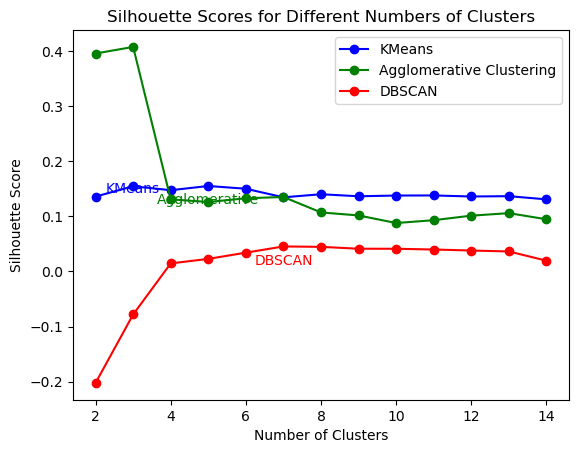

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

# Function to calculate silhouette scores for different numbers of clusters
def calculate_silhouettes(model, X_data):
    silhouettes = []
    for i in range(2, 15):
        if model == DBSCAN:
            cluster_model = model(eps=1.5, min_samples=i)
        else:
            cluster_model = model(n_clusters=i)
        labels = cluster_model.fit_predict(X_data)
        silhouette_avg = silhouette_score(X_data, labels)
        silhouettes.append(silhouette_avg)
    return silhouettes

# Assuming X_processed is your processed data
X_dense = X_processed.toarray()  # Convert to dense array

# Plotting silhouette scores for KMeans (blue color)
kmeans_silhouettes = calculate_silhouettes(KMeans, X_dense)
plt.plot(range(2, 15), kmeans_silhouettes, marker='o', label='KMeans', color='blue')

# Plotting silhouette scores for Agglomerative Clustering (green color)
agglomerative_silhouettes = calculate_silhouettes(AgglomerativeClustering, X_dense)
plt.plot(range(2, 15), agglomerative_silhouettes, marker='o', label='Agglomerative Clustering', color='green')

# Plotting silhouette scores for DBSCAN (red color)
dbscan_silhouettes = calculate_silhouettes(DBSCAN, X_dense)
plt.plot(range(2, 15), dbscan_silhouettes, marker='o', label='DBSCAN', color='red')

# Adding text annotations
plt.text(3, 0.15, 'KMeans', color='blue', fontsize=10, ha='center', va='center')
plt.text(5, 0.13, 'Agglomerative', color='green', fontsize=10, ha='center', va='center')
plt.text(7, 0.02, 'DBSCAN', color='red', fontsize=10, ha='center', va='center')

# Plot settings
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.legend()
plt.show()



The interpretation of silhouette and Davies-Bouldin scores depends on the context and the nature of our data. 

Silhouette Score:
The silhouette score ranges from -1 to 1.
A higher silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A score around 0.15 suggests that there is some structure in the data, but the clusters may be overlapping or not well-defined.

Davies-Bouldin Score:
The Davies-Bouldin score is defined as the average similarity measure of each cluster with the cluster that is most similar to it.
Lower Davies-Bouldin scores indicate better clustering. A score of 1 is the minimum possible score.
A score around 1.57 suggests a moderate level of separation between clusters.


In summary, scores indicate some structure in the data, but the clustering may not be very distinct or well-separated. These scores are not extremely high or low, indicating a moderate level of clustering quality. Keep in mind that the interpretation may vary based on the specifics of your data and the problem you're trying to solve. If possible, you could experiment with different clustering algorithms or hyperparameters to see if you can achieve better results.


Based on the scores:

##### KMeans:

Silhouette Score: 0.1534

Davies-Bouldin Score: 1.5734

###### Agglomerative Clustering:

Silhouette Score: 0.1309

Davies-Bouldin Score: 1.5600

###### DBSCAN:

Silhouette Score: 0.0229

Davies-Bouldin Score: 1.8622

Among the three clustering algorithms, KMeans appears to be the best choice as it has the highest Silhouette Score (indicating well-defined clusters) and a relatively low Davies-Bouldin Score (indicating compact and well-separated clusters).

##### supervised algorithms

##### Random Forest

In [15]:
### using gridsearch,pca and cross validation
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df_train_x is your DataFrame with KMeans cluster labels
# and assuming 'target_column' is a hypothetical target variable for supervised learning

# One-hot encode categorical variables
X = pd.get_dummies(df_train_x.drop(columns=['KMeans_Cluster']))
y = df_train_x['KMeans_Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA, StandardScaler, and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Set the desired explained variance
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
}

# Apply GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")
print("\nTest Set Results:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Cross-Validated Accuracy: 0.9193564360637602

Test Set Results:
Accuracy: 0.9213275968039336

Confusion Matrix:
 [[2222   87   36    0    0]
 [ 143 1241   83    0    0]
 [  84   71 2195    0    0]
 [   0    0    0   33    0]
 [   4    3    1    0  305]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2345
           1       0.89      0.85      0.87      1467
           2       0.95      0.93      0.94      2350
           3       1.00      1.00      1.00        33
           4       1.00      0.97      0.99       313

    accuracy                           0.92      6508
   macro avg       0.95      0.94      0.94      6508
weighted avg       0.92      0.92      0.92      6508



cross-validation is implicitly applied during the GridSearchCV process. The cv parameter in GridSearchCV determines the number of folds for cross-validation.



##### Logistsic Regression

In [18]:
#normal

from sklearn.linear_model import LogisticRegression


# Split the data into features (X) and KMeans cluster labels (y)
X = pd.get_dummies(df_train_x.drop(columns=['KMeans_Cluster']))
y = df_train_x['KMeans_Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logistic_model = LogisticRegression(random_state=42,max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Print the results for Logistic Regression
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print("Confusion Matrix:\n", conf_matrix_logistic)
print("Classification Report:\n", class_report_logistic)



Logistic Regression:
Accuracy: 0.8967424708051629
Confusion Matrix:
 [[2138   58  148    0    1]
 [  57 1296  114    0    0]
 [ 208   85 2057    0    0]
 [   0    0    1   32    0]
 [   0    0    0    0  313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2345
           1       0.90      0.88      0.89      1467
           2       0.89      0.88      0.88      2350
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00       313

    accuracy                           0.90      6508
   macro avg       0.93      0.93      0.93      6508
weighted avg       0.90      0.90      0.90      6508



/Users/saikumargandham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#### using gridsearch,pca and cross validation

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df_train_x is your DataFrame with KMeans cluster labels
# and assuming 'target_column' is a hypothetical target variable for supervised learning

# One-hot encode categorical variables
X = pd.get_dummies(df_train_x.drop(columns=['KMeans_Cluster']))
y = df_train_x['KMeans_Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA, StandardScaler, and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Set the desired explained variance
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Apply GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")
print("\nTest Set Results:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


/Users/saikumargandham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/saikumargandham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}
Best Cross-Validated Accuracy: 0.9292687850381756

Test Set Results:
Accuracy: 0.9316226183159189

Confusion Matrix:
 [[2196   78   70    0    1]
 [ 126 1281   60    0    0]
 [  54   56 2240    0    0]
 [   0    0    0   33    0]
 [   0    0    0    0  313]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2345
           1       0.91      0.87      0.89      1467
           2       0.95      0.95      0.95      2350
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00       313

    accuracy                           0.93      6508
   macro avg       0.95      0.95      0.95      6508
weighted avg       0.93      0.93      0.93      6508



/Users/saikumargandham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### DecisionTree

In [19]:
### using gridsearch,pca and cross validation

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Assuming df_train_x is your DataFrame with KMeans cluster labels
# and assuming 'target_column' is a hypothetical target variable for supervised learning

# One-hot encode categorical variables
X = pd.get_dummies(df_train_x.drop(columns=['KMeans_Cluster']))
y = df_train_x['KMeans_Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA, and Decision Tree Classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),  # Set the desired explained variance
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
}

# Apply GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")
print("\nTest Set Results:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 20}
Best Cross-Validated Accuracy: 0.6637850510919381

Test Set Results:
Accuracy: 0.6578057775046097

Confusion Matrix:
 [[2071   18  256    0    0]
 [ 210  300  957    0    0]
 [ 506  280 1564    0    0]
 [   0    0    0   33    0]
 [   0    0    0    0  313]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81      2345
           1       0.50      0.20      0.29      1467
           2       0.56      0.67      0.61      2350
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00       313

    accuracy                           0.66      6508
   macro avg       0.76      0.75      0.74      6508
weighted avg       0.64      0.66      0.63      6508



##### Conclusion:

##### Random Forest Model:
Accuracy: 92.13%
Key Points: Overall high accuracy, particularly strong in classifying classes 3 and 4.

##### Logistic Regression Model:
Accuracy: 93.16%
Key Points: The highest overall accuracy, performing well across all classes.

##### Decision Tree Model:
Accuracy: 65.78%
Key Points: Lower accuracy compared to the other models, especially struggling with classifying class 1.

##### Recommendation:
Considering the higher accuracy and consistent performance across different classes, the Logistic Regression model seems to be the most suitable choice among the three. It provides a good balance between precision, recall, and F1-score for each class. 

##### Without using Gridsearch:

##### Some additional steps:



1. Model Interpretability:

Feature Importance: For the models, you can extract and visualize feature importances to understand which features contribute the most to the predictions.

2. Model Evaluation:

ROC Curve and AUC: Especially for the Logistic Regression model, consider plotting the Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) to evaluate model performance across different probability thresholds.

3. Ensemble Models:

Voting Classifier: Combine multiple models (e.g., Random Forest, Logistic Regression, and Decision Tree) using a Voting Classifier. This can sometimes improve overall performance.